In [4]:
import os,re
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

Get the actual values of the test set

In [ ]:
df = pd.read_csv("resampled_and_merged.csv", sep=",")
test_df = df[["Datetime","Purchased(W)"]].tail(313).reset_index(drop=True)
test_df

Collect all results and merge them with the actual values into a single dataframe

In [ ]:
res_df = test_df[["Datetime", "Purchased(W)"]].copy()
res_df = res_df.rename(columns={"Purchased(W)": "Actual"})
res_df["Datetime"] = pd.to_datetime(res_df["Datetime"])

pattern = r"^res_(.*?)_[\d_-]+\.csv$"

for filename in os.listdir("."):
    if filename.endswith(".csv") and filename.startswith("res_"):
        df = pd.read_csv(filename, sep=",")
        if len(df) != 313:
            df = df.iloc[1:].reset_index(drop=True)
        
        stripped = re.sub(pattern, r"\1", filename) 
        res_df[stripped] = df["Predicted Net Load (W)"]
        #print(res_df)

res_df = res_df.set_index("Datetime")

res_df

Re-sample into 1-hour intervals for visualization purposes

In [ ]:
res_df = res_df.resample('60min').mean()
res_df

In [ ]:
cols_3d = ["Actual", "XGBoost_three_days", "CatBoost_three_days", "MLP_three_days"]
cols_7d = ["Actual", "XGBoost_seven_days", "CatBoost_seven_days", "MLP_seven_days"]
cols_1m = ["Actual", "XGBoost_one_month", "CatBoost_one_month", "MLP_one_month"]
cols_3m = ["Actual", "XGBoost_three_months", "CatBoost_three_months", "MLP_three_months"]
cols_5m = ["Actual", "XGBoost_five_months", "CatBoost_five_months", "MLP_five_months"]

df_3d = res_df[cols_3d]
df_7d = res_df[cols_7d]
df_1m = res_df[cols_1m]
df_3m = res_df[cols_3m]
df_5m = res_df[cols_5m]

df_3d

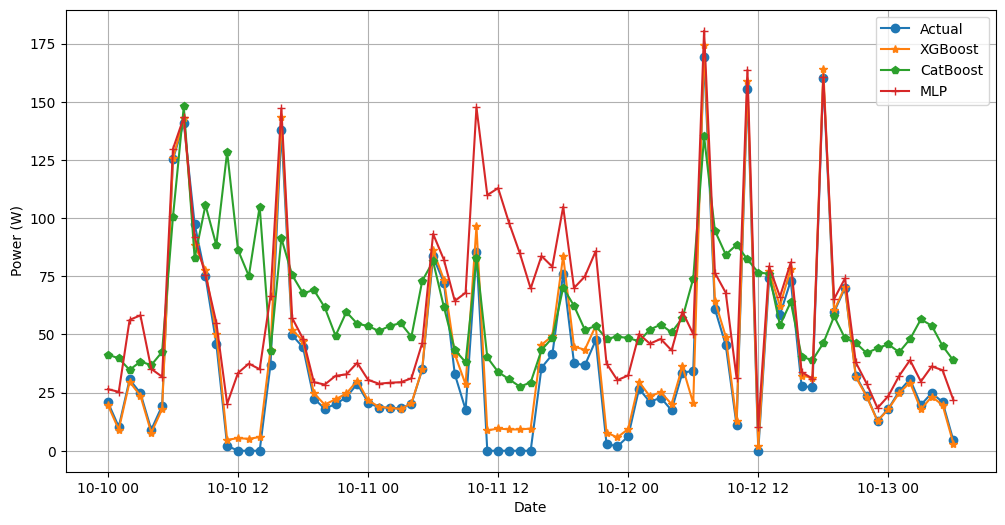

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.plot(df_3d.index, df_3d['Actual'], label='Actual', marker='o')
plt.plot(df_3d.index, df_3d['XGBoost_three_days'], label='XGBoost', marker='*')
plt.plot(df_3d.index, df_3d['CatBoost_three_days'], label='CatBoost', marker='p')
plt.plot(df_3d.index, df_3d['MLP_three_days'], label='MLP', marker='+')
plt.xlabel('Date')
plt.ylabel('Power (W)')
#plt.title('Daily Household Data')
plt.legend()
plt.grid(True)
plt.show()

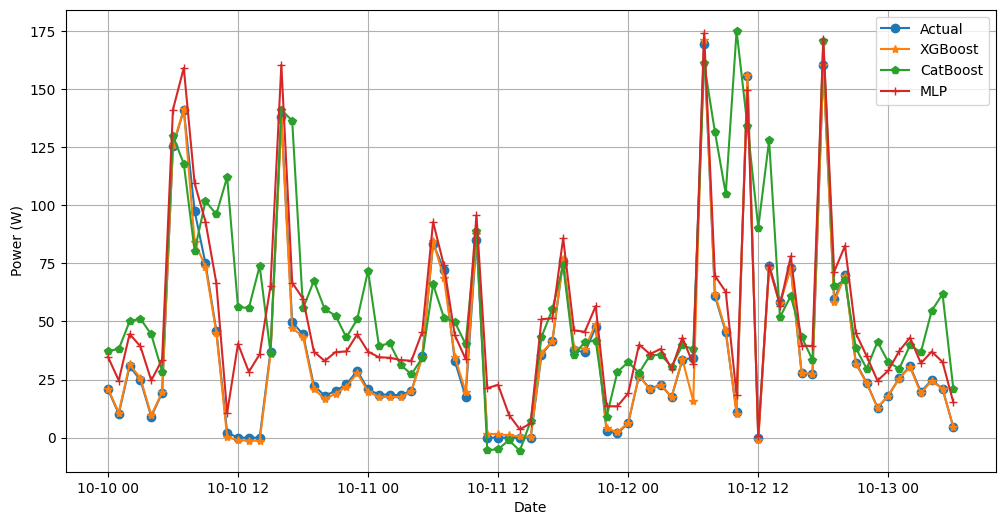

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df_7d.index, df_7d['Actual'], label='Actual', marker='o')
plt.plot(df_7d.index, df_7d['XGBoost_seven_days'], label='XGBoost', marker='*')
plt.plot(df_7d.index, df_7d['CatBoost_seven_days'], label='CatBoost', marker='p')
plt.plot(df_7d.index, df_7d['MLP_seven_days'], label='MLP', marker='+')
plt.xlabel('Date')
plt.ylabel('Power (W)')
#plt.title('Daily Household Data')
plt.legend()
plt.grid(True)
plt.show()

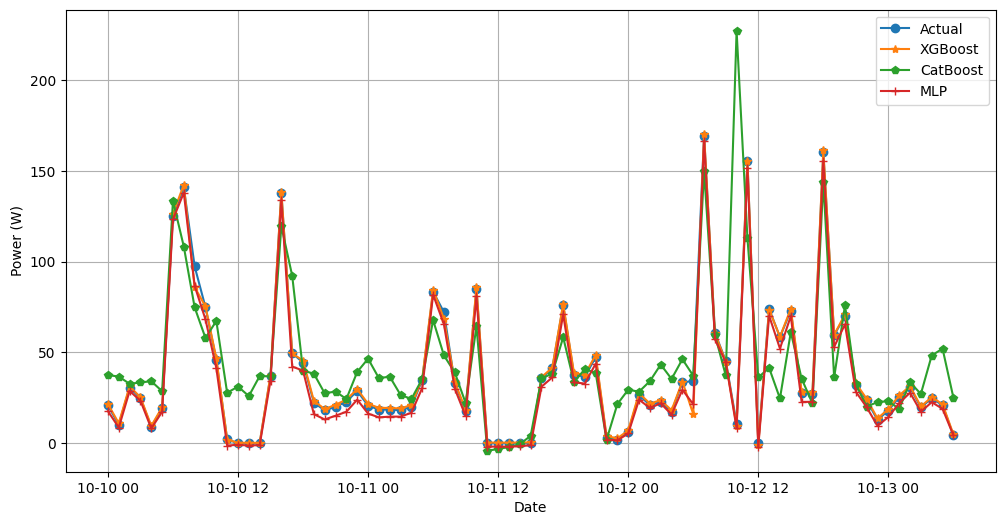

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(df_1m.index, df_1m['Actual'], label='Actual', marker='o')
plt.plot(df_1m.index, df_1m['XGBoost_one_month'], label='XGBoost', marker='*')
plt.plot(df_1m.index, df_1m['CatBoost_one_month'], label='CatBoost', marker='p')
plt.plot(df_1m.index, df_1m['MLP_one_month'], label='MLP', marker='+')
plt.xlabel('Date')
plt.ylabel('Power (W)')
#plt.title('Daily Household Data')
plt.legend()
plt.grid(True)
plt.show()

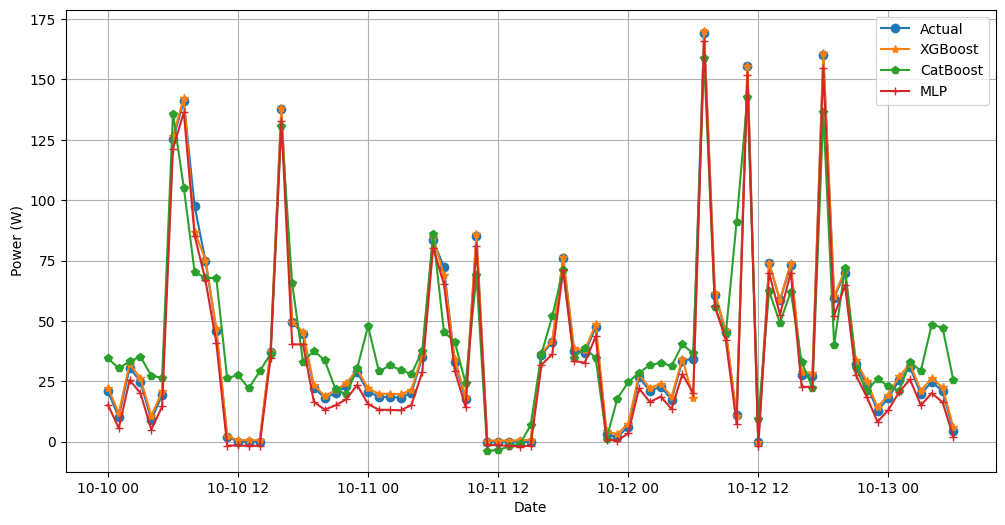

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df_3m.index, df_3m['Actual'], label='Actual', marker='o')
plt.plot(df_3m.index, df_3m['XGBoost_three_months'], label='XGBoost', marker='*')
plt.plot(df_3m.index, df_3m['CatBoost_three_months'], label='CatBoost', marker='p')
plt.plot(df_3m.index, df_3m['MLP_three_months'], label='MLP', marker='+')
plt.xlabel('Date')
plt.ylabel('Power (W)')
#plt.title('Daily Household Data')
plt.legend()
plt.grid(True)
plt.show()

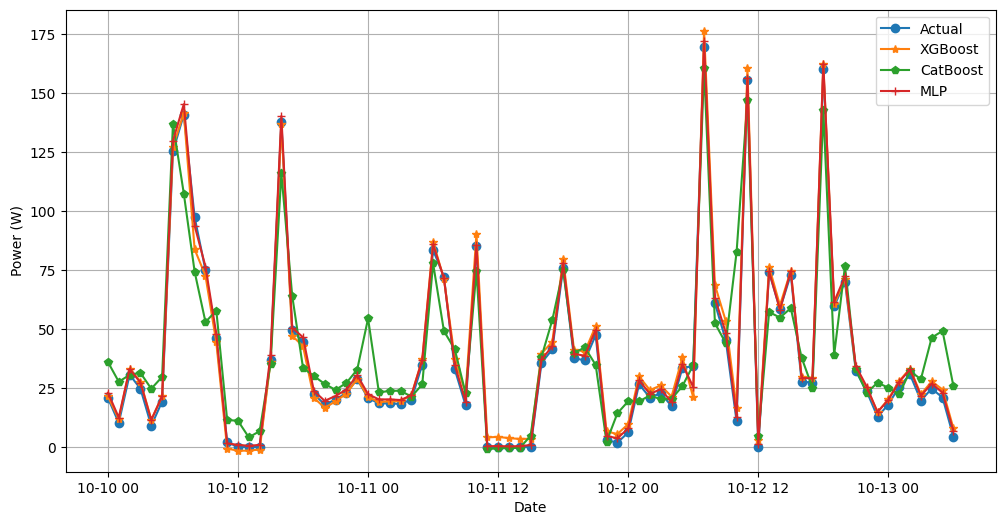

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(df_5m.index, df_5m['Actual'], label='Actual', marker='o')
plt.plot(df_5m.index, df_5m['XGBoost_five_months'], label='XGBoost', marker='*')
plt.plot(df_5m.index, df_5m['CatBoost_five_months'], label='CatBoost', marker='p')
plt.plot(df_5m.index, df_5m['MLP_five_months'], label='MLP', marker='+')
plt.xlabel('Date')
plt.ylabel('Power (W)')
#plt.title('Daily Household Data')
plt.legend()
plt.grid(True)
plt.show()